In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Метод на най-малките квадрати - част 1

### Задача 1
Да се намери линейна функция, която приближава по метода на най-малките квадрати данните от таблицата

|x| 0 | 1 | 2 | 3 | 4
|---|---|---|---|---|---|
|y|0|1|1|2|2|

In [2]:
from sympy import symbols, diff, Eq, solve

a, b = symbols('a, b')

def phi(a, b):
    return b ** 2 + (a + b - 1) ** 2 + (2 * a + b - 1) ** 2 + (3 * a + b - 2) ** 2 + (4 * a + b - 2) ** 2

equations = [Eq(diff(phi(a, b), a), 0),
             Eq(diff(phi(a, b), b), 0)]

solve(equations)

{a: 1/2, b: 1/5}

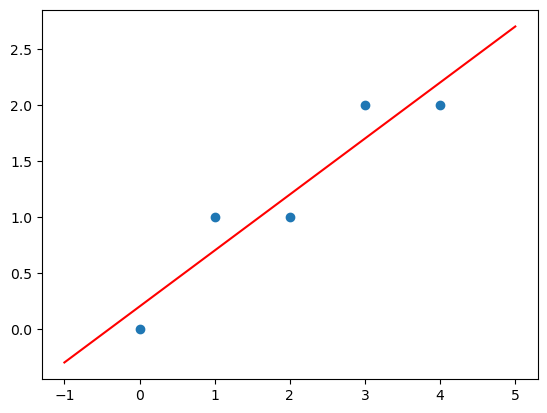

In [5]:
def f(x):
    return 1/2 * x + 1/5
    
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 1, 2, 2])
x_axis = np.linspace(-1, 5, 100)
plt.scatter(x, y)
plt.plot(x_axis, f(x_axis), 'red')
plt.show()

### Задача 2

Във файла *CO_2_data.csv* се съдръжат данни за нивата на въглеродния диоксид в атмосферата (в млрд. тонове) за периода 1940-2022г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи линейна функция, която приближава данните.

*Източник: https://www.statista.com/statistics/276629/global-co2-emissions/*

In [7]:
import pandas as pd 
df = pd.read_csv('CO_2_data.csv')
df.head()

,year,co2
0,1940,4.85
1,1941,4.97
2,1942,4.95
3,1943,5.04
4,1944,5.11


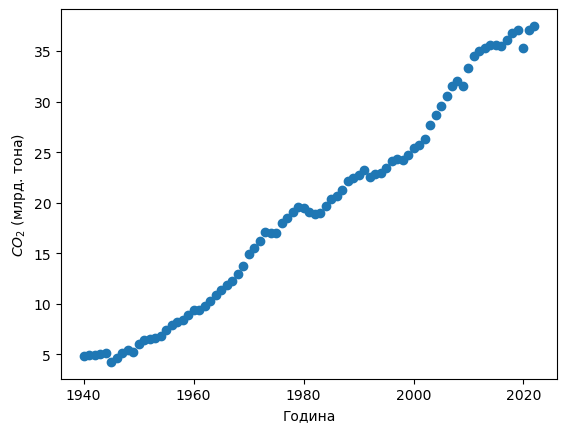

In [9]:
years = df.loc[:, "year"]
co2 = df.loc[:, "co2"]
plt.scatter(years, co2)
plt.xlabel('Година')
plt.ylabel('$CO_2$ (млрд. тона)')
plt.show()

In [11]:
a, b = symbols('a, b')

def f(a, b, x):
    return a * x + b

def phi(a, b):
    sum_of_squares = 0
    for i in range(years.size):
        sum_of_squares += (f(a, b, years[i]) - co2[i]) ** 2
    return sum_of_squares

equations = [Eq(diff(phi(a, b), a), 0),
             Eq(diff(phi(a, b), b), 0)]

sol = solve(equations)
print(sol)

{a: 0.430363124973763, b: -833.280314428446}


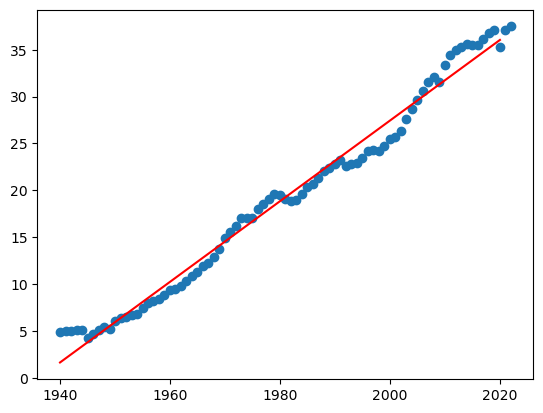

In [13]:
x_axis = np.linspace(1940, 2020, 1000)
plt.scatter(years, co2)
plt.plot(x_axis, f(sol[a], sol[b], x_axis), 'red')
plt.show()

### Задача 3

Известно е, че връзката между скоростта на вятъра и генерираното количество електроенергия от една вятърна турбина може да се опише чрез кубична функция.
Във файла *wind_turbine_data_sample.csv* се съдръжат измервания за количеството прозиведена електроенергия (kW) от конкретен вятърен генератор в зависимост от скоростта на вятъра (m/s).
Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи полином от трета степен, който приближава данните.

*Източник: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset/*

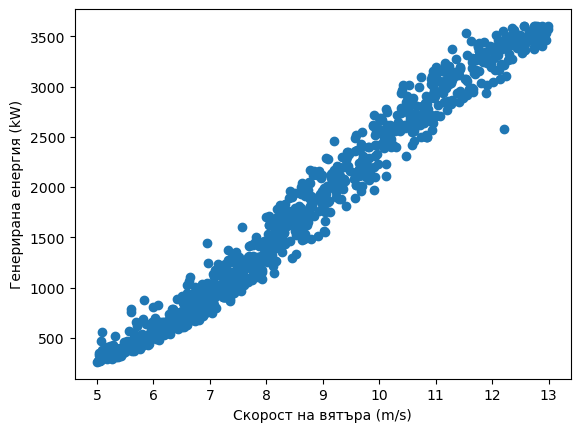

In [14]:
df = pd.read_csv('wind_turbine_data_sample.csv')
wind_speed = df.loc[:, "wind speed"]
power_output = df.loc[:, "power output"]
plt.scatter(wind_speed, power_output)
plt.xlabel('Скорост на вятъра (m/s)')
plt.ylabel('Генерирана енергия (kW)')
plt.show()

In [15]:
a, b, c, d = symbols('a, b, c, d')

def f(a, b, c, d, x):
    return a * x ** 3 + b * x ** 2 + c * x + d

def phi(a, b, c, d):
    sum_of_squares = 0
    for i in range(wind_speed.size):
        sum_of_squares += (f(a, b, c, d, wind_speed[i]) - power_output[i]) ** 2
    return sum_of_squares

# REMARK: The symbolic construction and solution of this system of equations can possibly take more than 2-3 minutes!!!
equations = [Eq(diff(phi(a, b, c, d), a), 0),
             Eq(diff(phi(a, b, c, d), b), 0),
             Eq(diff(phi(a, b, c, d), c), 0),
             Eq(diff(phi(a, b, c, d), d), 0)]


sol = solve(equations)
print(sol)

{a: -7.59606064982793, b: 205.917112180286, c: -1334.75406713179, d: 2787.95787856771}


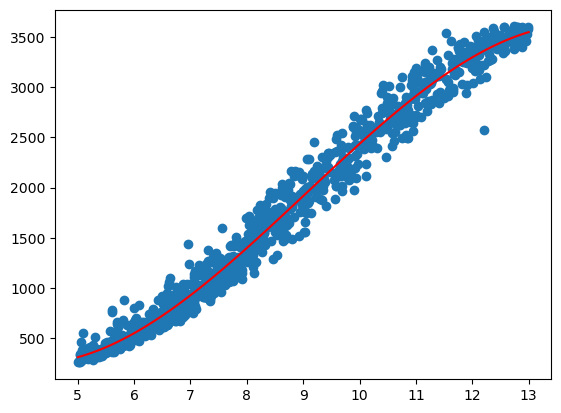

In [16]:
x_axis = np.linspace(5, 13, 100)
plt.scatter(wind_speed, power_output)
plt.plot(x_axis, f(sol[a], sol[b], sol[c], sol[d], x_axis), 'red')
plt.show()

### Задача 4

Във файла *amazon_sales_net_revenue.csv* се съдръжат данни за годишния приход на Amazon в млрд. щатски долари за периода 2004 - 2021г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати, да се построи функция от вида $ f(x) = a e^{bx}$, която моделира данните.


*Източник: https://www.statista.com/statistics/266282/annual-net-revenue-of-amazoncom/*

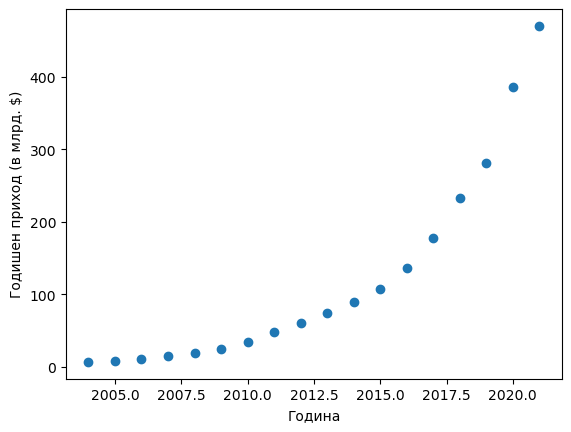

In [15]:
df = pd.read_csv('amazon_sales_net_revenue.csv')
years = df.loc[:, "year"]
revenue = df.loc[:, "revenue"]
plt.scatter(years, revenue)
plt.xlabel('Година')
plt.ylabel('Годишен приход (в млрд. $)')
plt.show()

In [17]:
#solve the linearized model ln y = c + bx, where c = ln(x)
c, b = symbols('c, b')

def f(c, b, x):
    return b * x + c

def phi(c, b):
    sum_of_squares = 0
    for i in range(years.size):
        sum_of_squares += (f(c, b, years[i]) - np.log(revenue[i])) ** 2
    return sum_of_squares

equations = [Eq(diff(phi(c, b), b), 0),
             Eq(diff(phi(c, b), c), 0)]

sol = solve(equations)
print(sol)

{b: 0.249215934116305, c: -497.459709696735}


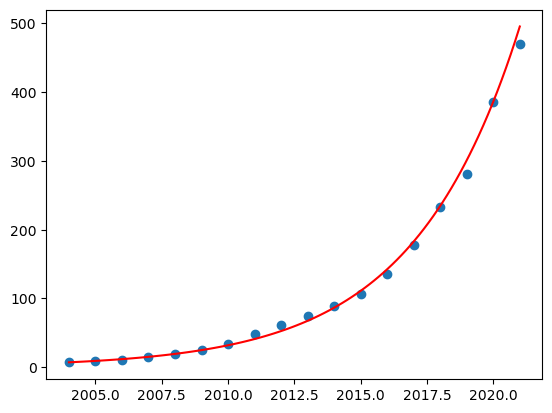

In [19]:
def exp_func(x):
    return np.exp(float(sol[c])  + float(sol[b]) * x)


x_axis = np.linspace(2004, 2021, 100)
plt.scatter(years, revenue)
plt.plot(x_axis, exp_func(x_axis), 'red')
plt.show()